# Analysis of penguin beaks

In [1]:
import pandas as pd

### 1. Read and inspect the dataset

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [3]:
# number of rows and columns
df.shape

(333, 7)

In [4]:
# column names to be used in expressions below
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### 2. Absolute frequencies

We can calculate absolute frequencies (number of penguins) in a couple of different ways.

One easy way is to inspect a histogram of the variable you are interested in. On the x-axis you have the values (beak size in mm), on the y-axis the number of penguins for the according bin. You typically want to try different numbers of bins to see if there are any artifacts. If they all look more or less similar it is good.

<AxesSubplot: >

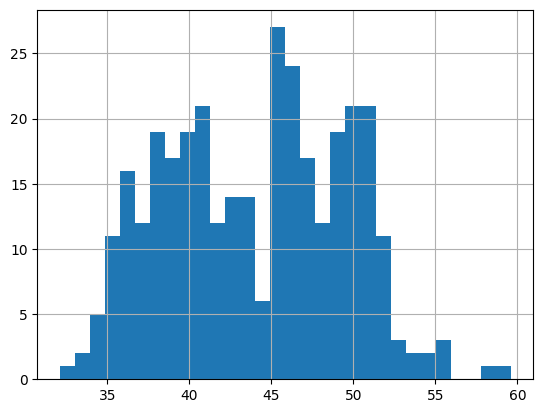

In [5]:
df['bill_length_mm'].hist(bins=30)

We see that this is not a bell-shaped curve. There is one big gap in the middle, and maybe a seond one on the right side. This means there could be multiple sub-groups of penguins.

We can try to group by species and then plot multiple histograms on top of each other. We see that the species separate nicely but the plot is not very good:

species
Adelie       AxesSubplot(0.125,0.11;0.775x0.77)
Chinstrap    AxesSubplot(0.125,0.11;0.775x0.77)
Gentoo       AxesSubplot(0.125,0.11;0.775x0.77)
Name: bill_length_mm, dtype: object

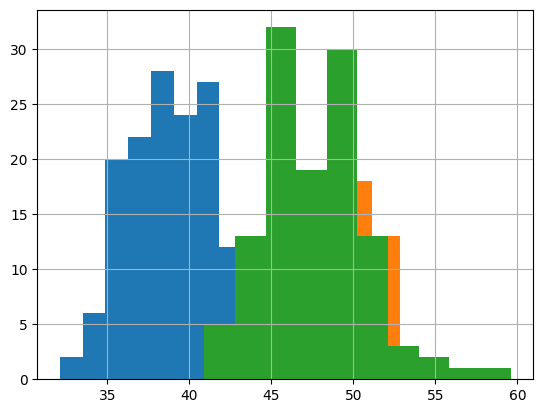

In [6]:
df.groupby('species')['bill_length_mm'].hist()

The `seaborn` library produces much better plots:

In [7]:
import seaborn as sns

<AxesSubplot: xlabel='bill_length_mm', ylabel='Count'>

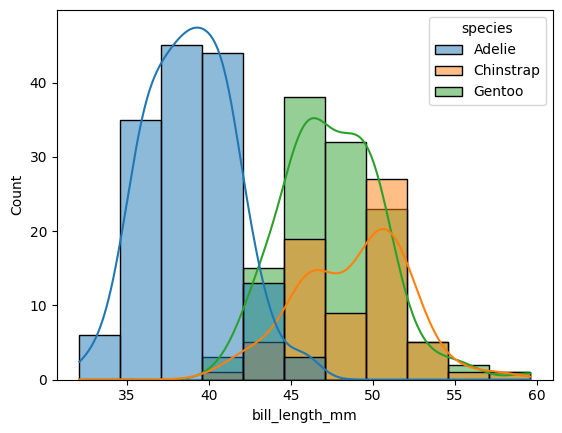

In [8]:
sns.histplot(data=df, hue='species', x="bill_length_mm", kde=True)

### 3. Other aggregation functions

Instead of a histogram, you can summarize (aggregate) the data in different ways. A good comparison is plotting the absolute frequencies for different groups directly:

<AxesSubplot: xlabel='species'>

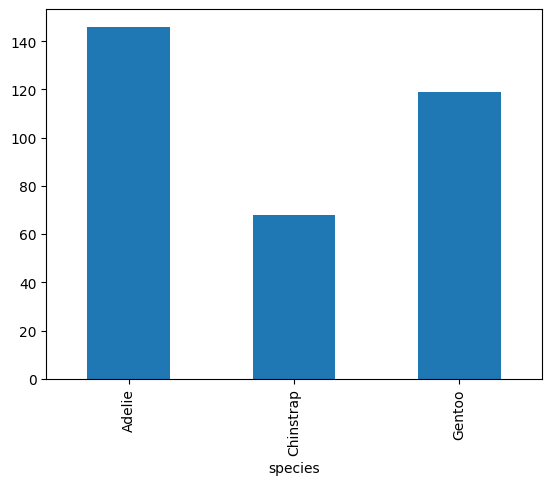

In [11]:
# for the count it does not matter which column we select
df.groupby('species')['bill_length_mm'].count().plot.bar()
# also try mean, median or std instead of count

You might want to check some other metrics as well:

In [12]:
df.groupby('species')["bill_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


### 4. Pivot table: beak length

**a pivot table** groups your data by **two** categorical variables. You get a nice table that is a good base for plotting.

In [13]:
pivot = df.groupby(['species', 'sex'])['bill_length_mm'].median()
pivot = pivot.unstack()
pivot

sex,Female,Male
species,,
Adelie,37.0,40.60
Chinstrap,46.3,50.95
Gentoo,45.5,49.50


<AxesSubplot: xlabel='species'>

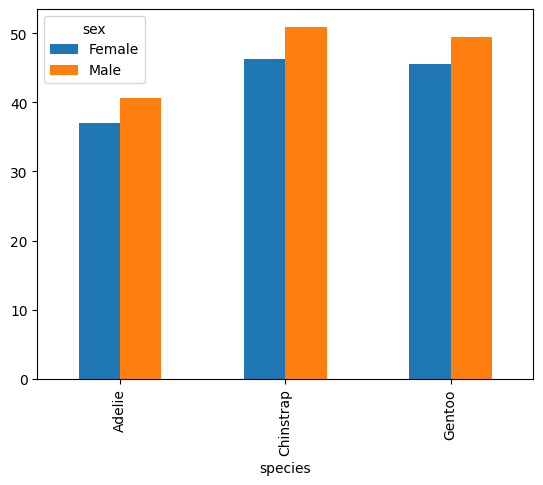

In [14]:
# pivot tables should be generally easy to plot
pivot.plot.bar()

<AxesSubplot: xlabel='sex'>

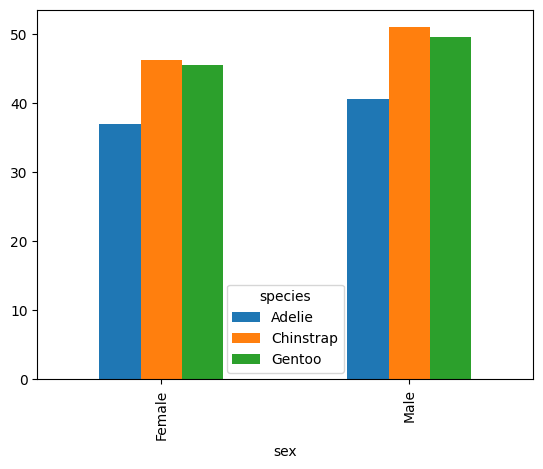

In [15]:
# transpose turns the table by 90° changing the groups and labels
pivot.transpose().plot.bar()

### 5. Use your own function

The `.apply()` mechanism in Python/pandas allows you to plug in any list-processing function into a `.groupby()` expression:

In [16]:
def smallest(x):
    return min(x)

In [17]:
pivot = df.groupby(['species', 'sex'])['bill_length_mm'].apply(smallest)
pivot = pivot.unstack()
pivot

sex,Female,Male
species,,
Adelie,32.1,34.6
Chinstrap,40.9,48.5
Gentoo,40.9,44.4


### 6. Count per species/gender

In [18]:
pivot = df.groupby(['species', 'sex'])['bill_length_mm'].count()
pivot = pivot.unstack()
pivot

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [ ]:
# TODO: normalize the data by the row/column/total sum
# see exercise PDF for code examples that do this

In [ ]:
# here is an example paragraph for a scientific report. More to come.

## Report on penguin beaks

The three penguin species in the dataset differ in the size of their beaks. **Adelie** penguins have the smallest beaks (mean size 38.8mm). The beaks of **Gentoo** (47.6mm) and **Chinstrap** (48.8mm) penguins are very close to each other. It could be that there are two subgroups for each species (possibly gender or island) but at this point we do not know for sure.